# Task 4 - Cricket Player Performance Prediction using machine learning

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Batsman_Data=pd.read_csv('Batsman_Data.csv')
Bowler_Data=pd.read_csv('Bowler_Data.csv')
Ground_Averages=pd.read_csv('Ground_Averages.csv')
ODI_Match_Results=pd.read_csv('ODI_Match_Results.csv')
ODI_Match_Totals=pd.read_csv('ODI_Match_Totals.csv')
WC_players=pd.read_csv('WC_players.csv')

In [3]:
Batsman_Data.head(5)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [4]:
Batsman_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  object
 3   BF          11149 non-null  object
 4   SR          11149 non-null  object
 5   4s          11149 non-null  object
 6   6s          11149 non-null  object
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB


In [5]:
Batsman_Data.isnull().sum()

Unnamed: 0    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64

In [6]:
Batsman_Data.dtypes

Unnamed: 0     int64
Bat1          object
Runs          object
BF            object
SR            object
4s            object
6s            object
Opposition    object
Ground        object
Start Date    object
Match_ID      object
Batsman       object
Player_ID      int64
dtype: object

In [7]:
columns_to_replace = ['Runs', 'BF', 'SR', '4s', '6s']

In [8]:
Batsman_Data[columns_to_replace]=Batsman_Data[columns_to_replace].replace('-', '0')
Batsman_Data[columns_to_replace]=Batsman_Data[columns_to_replace].apply(pd.to_numeric)
Batsman_Data.head(5)

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,0,0,0.0,0,0,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,0,0,0.0,0,0,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,0,0,0.0,0,0,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,0,0,0.0,0,0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,0,0,0.0,0,0,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


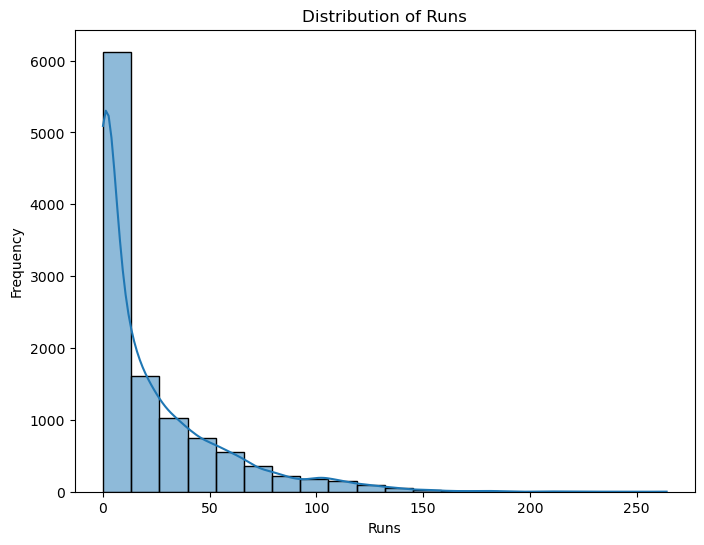

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(Batsman_Data['Runs'], bins=20, kde=True)
plt.title('Distribution of Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

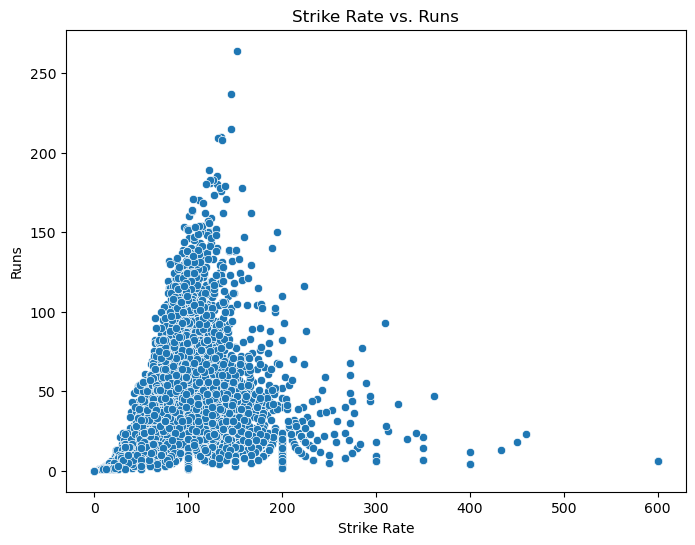

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SR', y='Runs', data=Batsman_Data)
plt.title('Strike Rate vs. Runs')
plt.xlabel('Strike Rate')
plt.ylabel('Runs')
plt.show()

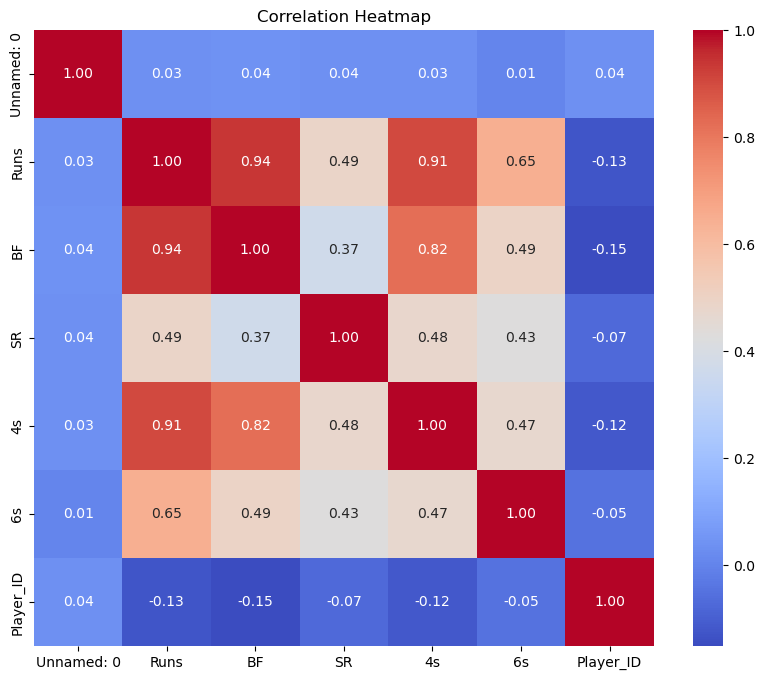

In [11]:
plt.figure(figsize=(10, 8))
correlation_matrix = Batsman_Data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

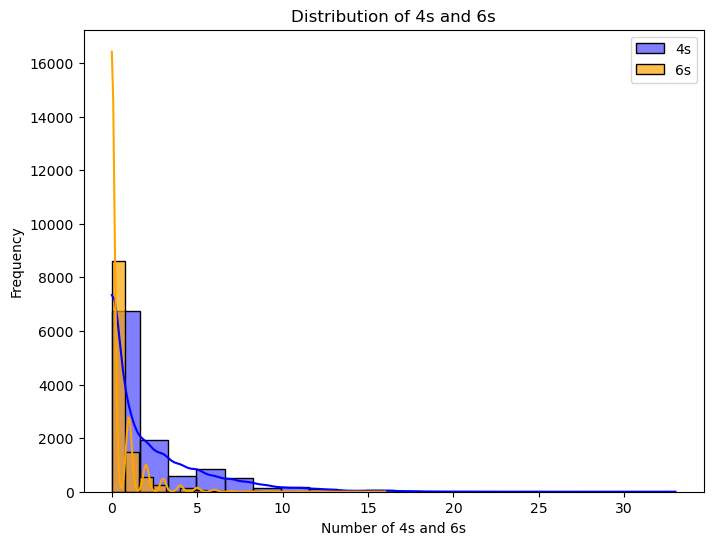

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(Batsman_Data['4s'], bins=20, kde=True, color='blue', label='4s')
sns.histplot(Batsman_Data['6s'], bins=20, kde=True, color='orange', label='6s', alpha=0.7)
plt.title('Distribution of 4s and 6s')
plt.xlabel('Number of 4s and 6s')
plt.ylabel('Frequency')
plt.legend()
plt.show()

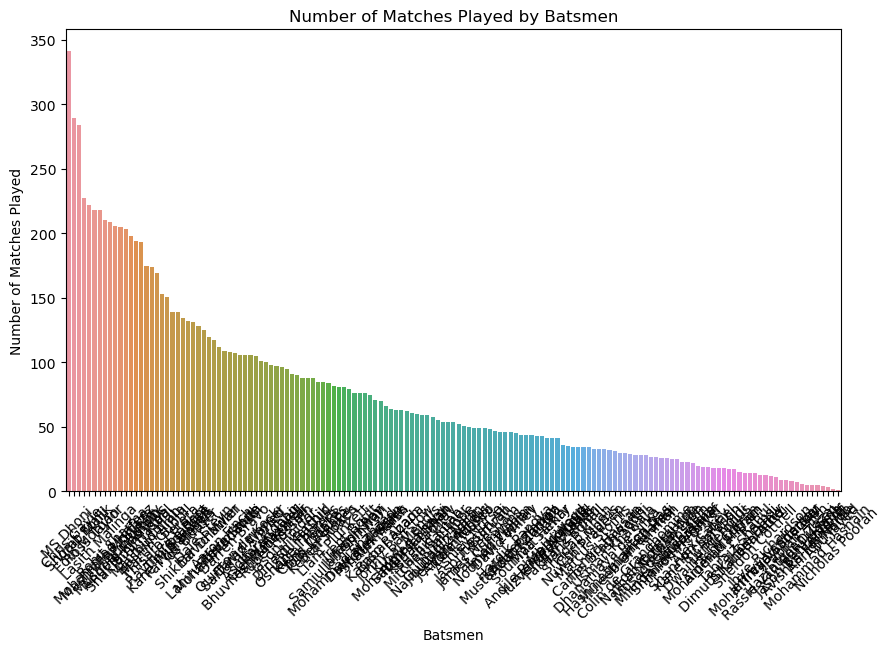

In [13]:
plt.figure(figsize=(10, 6))
matches_played = Batsman_Data['Batsman'].value_counts()
sns.barplot(x=matches_played.index, y=matches_played.values)
plt.title('Number of Matches Played by Batsmen')
plt.xlabel('Batsmen')
plt.ylabel('Number of Matches Played')
plt.xticks(rotation=45)
plt.show()

# Model Building

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
X=Batsman_Data[['BF', 'SR', '4s', '6s']]
y=Batsman_Data['Runs']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1))
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [17]:
y_pred = svr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 27.30140134847944
R-squared: 0.9709500401633084


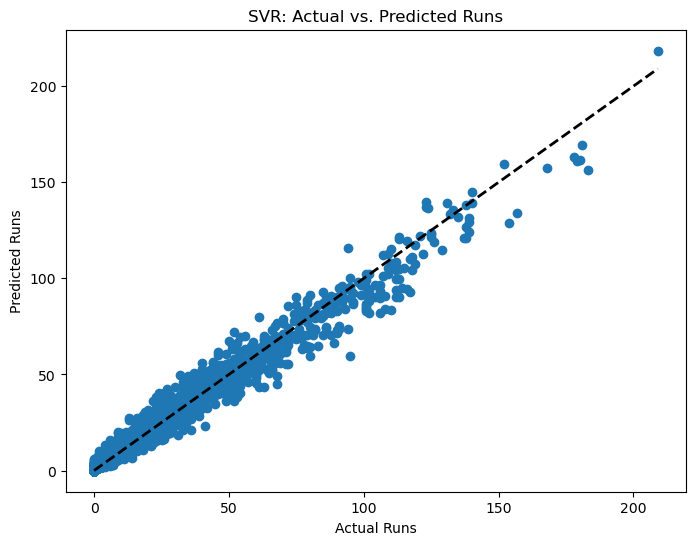

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_imputed, y_pred)
plt.plot([min(y_test_imputed), max(y_test_imputed)], [min(y_test_imputed), max(y_test_imputed)], 'k--', lw=2)
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('SVR: Actual vs. Predicted Runs')
plt.show()